In [1]:
# 단순선형회귀분석

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [56]:
# 선형회귀 관련 sklearn 라이브러리 불러오기

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# 선형회귀 관련 statsmodels 라이브러리

import statsmodels.api as sm

In [8]:
# 간단한 예제 
X = np.array([[0],[1],[2]])



In [9]:
y =np.array([0, 1.2, 1.6])

In [10]:
# 선형회귀 객체 생성
reg = linear_model.LinearRegression()

In [11]:
# training >> fit : 모델에 적합하게 데이터 정렬
reg.fit(X, y)

LinearRegression()

In [17]:
# training data로 예측

pred_train = reg.predict(X)
pred_train

array([0.13333333, 0.93333333, 1.73333333])

In [19]:
# test data로 예측

pred_test = reg.predict([[1.5]])
pred_test

array([1.33333333])

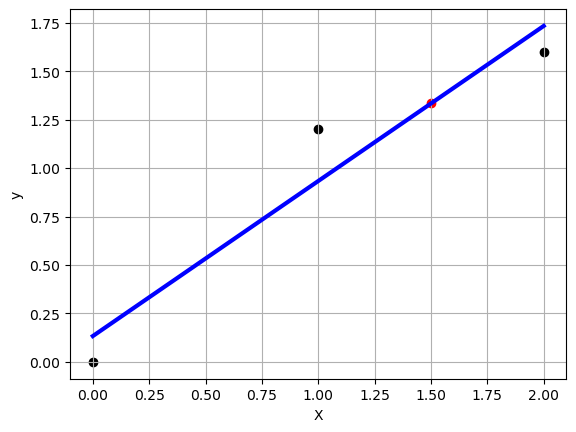

In [21]:
# plot outputs

plt.scatter(X, y, color = 'black')
plt.scatter(1.5, pred_test, color = 'red') # 예측한 값
plt.plot(X, pred_train, color = 'blue', linewidth = 3)

plt.xlabel('X')
plt.ylabel('y')

plt.grid()
plt.show()

In [22]:
# test data 예측값

pred_test

array([1.33333333])

In [23]:
# coefficient(회귀계수, 기울기 : weight)
reg.coef_

array([0.8])

In [26]:
# 실데이터 사용 분석해 보기

ad = pd.read_csv('./Advertising.csv', index_col = 0)
ad

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
...,...,...,...,...
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5


In [27]:
# advertising data 활용 선형회귀 분석

# train data / test data 분리 >> 과적합 방지

train = ad[:-20]
test = ad[-20 : ]

In [31]:
# train data의 feature와 response 분리
train_X = train.drop('Sales', axis = 1)
train_y = train['Sales']

# test data의 feature와 response 분리
test_X = test.drop('Sales', axis = 1)
test_y = test['Sales']

In [35]:
# 선형회귀 객체 생성

reg = linear_model.LinearRegression()


In [39]:
# train data 활용 적합(fit)

reg.fit(train_X[['TV']], train_y) # train data 중 TV 만 사용

LinearRegression()

In [45]:
train_y_pred = reg.predict(train_X[['TV']])
train_y_pred

array([17.95508512,  9.25168867,  7.97150159, 14.26927176, 15.64324544,
        7.57290854,  9.86130157, 12.80151147,  7.56821921, 16.53421814,
       10.26458395, 17.23292831,  8.28099737, 11.73703357, 16.73585933,
       16.32788762, 10.34430256, 20.36071141, 10.40995318, 14.0723199 ,
       17.40643352, 18.29740621,  7.78392839, 17.87067718, 10.08638941,
       19.49318536, 13.86598938, 18.42401812, 18.83198983, 10.4756038 ,
       20.89998435, 12.45919038, 11.72296558, 19.61979727, 11.65262563,
       20.79681909, 19.68075856, 10.66786633,  9.18603805, 17.85660919,
       16.66083005, 15.4650509 , 20.93280966, 16.86716057,  8.34195866,
       15.37595363, 11.37126583, 18.41463946, 17.81909455, 10.30209859,
       16.53421814, 11.87302414, 17.31264692, 15.72765338, 19.4838067 ,
       16.49201417,  7.50725792, 13.55180427, 17.05004444, 17.04535511,
        9.67372837, 19.41815608, 18.38650348, 11.98087872, 13.31264844,
       10.40057452,  8.64207578, 13.6971735 , 18.29740621, 17.33

In [41]:
test_y_pred = reg.predict(test_X[['TV']])
test_y_pred

array([14.50842759, 17.41112285,  9.80034028, 20.65144986, 19.06645633,
       16.7780633 , 13.70655216, 16.12624643, 20.57642058,  8.04184154,
        9.01722218, 10.70538097,  7.97150159, 14.98673924, 14.18486382,
        8.95626089, 11.58228568, 15.4650509 , 20.46387667, 18.04887172])

In [48]:
# 회귀계수(기울기) coefficient
print('Coefficients :' , reg.coef_[0])
print()

# train data의 MSE
print('MSE : %.3f'%mean_squared_error(train_y, train_y_pred))
print()

# testn data의 MSE
print('MSE : %.3f'%mean_squared_error(test_y, test_y_pred))
print()

# train data의 r_square
print("R^2 : %.3f"%(r2_score(train_y, train_y_pred)))
print()

# test data의 r_square
print("R^2 : %.3f"%(r2_score(test_y, test_y_pred)))
print()

Coefficients : 0.046893299836478976

MSE : 10.316

MSE : 12.324

R^2 : 0.607

R^2 : 0.642



In [49]:
# statsmodels 선형회귀 분석

# statsmodels 사용을 위한 X0 feature(intercpet) 추가

# statsmodels의 OLS 함수 : 데이터 내에 intercept 해당하는 변수 필요

In [51]:
sm_train_X = train_X
sm_train_X['X0'] = 1

sm_test_X = test_X
sm_test_X['X0'] = 1

In [57]:
# 훈련

result = sm.OLS(train_y, sm_train_X[['X0', 'TV']]).fit()
# 결과변수(종속변수)인 train_y를 먼저 적어줌.

# 훈련결과 확인
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.607
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     275.2
Date:                Tue, 14 Feb 2023   Prob (F-statistic):           5.76e-38
Time:                        11:39:55   Log-Likelihood:                -465.44
No. Observations:                 180   AIC:                             934.9
Df Residuals:                     178   BIC:                             941.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
X0             7.1649      0.478     14.978      0.000       6.221       8.109
TV             0.0469      0.003     16.589      0.000       0.041       0.052
==============================================================================
Omnibus:                        0.515   Durbin-Watson:                   1.890
Prob(Omnibus):                  0.773   Jarque-Bera (JB):                0.547
Skew:                          -0.127   Prob(JB):                        0.761
Kurtosis:                       2.906   Cond. No.                         336.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

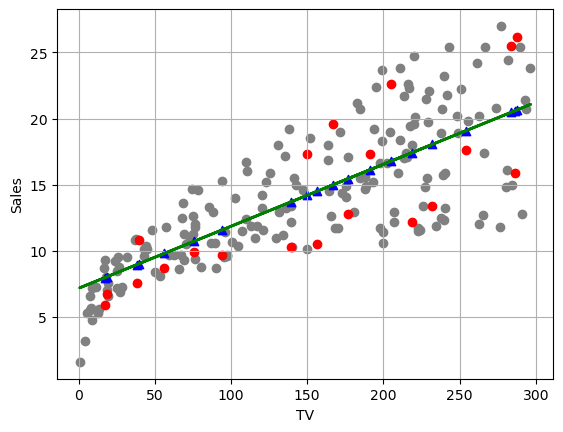

In [62]:
# 데이터 시각화

plt.scatter(train_X['TV'], train_y, color = 'gray') # trian data
plt.scatter(test_X['TV'], test_y, color = 'red') # test data

plt.plot(train_X['TV'], train_y_pred, color = 'green', linewidth = 2)
plt.scatter(test_X['TV'], test_y_pred, color = 'blue', marker = '^')
plt.xlabel('TV')
plt.ylabel('Sales')
plt.grid()
plt.show()